# YASH CAR PRICE PREDICTOR PROJECT 

In [2]:
import pandas as pd
import numpy as np

In [3]:
car = pd.read_csv('quikr_car.csv')

In [4]:
car.head(30)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol


# EXPLORATORY DATA ANALYSIS

In [5]:
car.shape

(892, 6)

In [6]:
car['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
887         3,10,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 892, dtype: object

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [8]:
car.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


# ASSESMENT OF ANOMALIES IN DATASET
### Quality of data
### year has many non year values
### year object to integer
### many non price elements are there(ask for price)
### price object to int
### kms_driven -->obj to int 
### fuel_type has nan values
### keep first 3 words of name

In [9]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [10]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [11]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [12]:
car['fuel_type'].unique()


array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [13]:
car.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

# Data Preprocessing

In [14]:
backup=car.copy()  #for backup purposes

In [15]:
car_dup=car.copy() 

In [16]:
car['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object

In [17]:
car=car[car['year'].str.isnumeric()] #non numeric ones will be removed
car_dup=car_dup[car_dup['year'].str.isnumeric()]

In [18]:
car['year']=car['year'].astype(int)  #boolean to integer
car_dup['year']=car_dup['year'].astype(int)  

In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


In [20]:
car['year'].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [21]:
car=car[car['Price']!="Ask For Price"] #have removed rows which contained ask for price
car_dup=car_dup[car_dup['Price']!="Ask For Price"]

In [22]:
car['Price']

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object

In [23]:
car['Price']=car['Price'].str.replace(',','').astype(int)
car_dup['Price']=car_dup['Price'].str.replace(',','').astype(int)

In [24]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [25]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [26]:
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0) #keeping first element and splitting kms
car_dup['kms_driven']=car_dup['kms_driven'].str.split(' ').str.get(0)

In [27]:
car['kms_driven']=car['kms_driven'].str.replace(',','')
car_dup['kms_driven']=car_dup['kms_driven'].str.replace(',','')

In [28]:
car[car['kms_driven'].isna()]
car_dup[car_dup['kms_driven'].isna()]

,name,company,year,Price,kms_driven,fuel_type


In [29]:
car=car[~car['kms_driven'].isna()] #saving non nan values in car
car_dup=car_dup[~car_dup['kms_driven'].isna()]

In [30]:
car=car[car['kms_driven'].str.isnumeric()]
car_dup=car_dup[car_dup['kms_driven'].str.isnumeric()]

In [31]:
car['kms_driven'].unique()

array(['45000', '40', '28000', '36000', '41000', '25000', '24530',
       '60000', '30000', '32000', '48660', '4000', '16934', '43000',
       '35550', '39522', '39000', '55000', '72000', '15975', '70000',
       '23452', '35522', '48508', '15487', '82000', '20000', '68000',
       '38000', '27000', '33000', '46000', '16000', '47000', '35000',
       '30874', '15000', '29685', '130000', '19000', '54000', '13000',
       '38200', '22000', '50000', '13500', '3600', '45863', '60500',
       '12500', '18000', '13349', '29000', '44000', '42000', '14000',
       '49000', '36200', '51000', '104000', '33333', '33600', '5600',
       '7500', '26000', '24330', '65480', '200000', '59000', '99000',
       '2800', '21000', '11000', '66000', '3000', '7000', '38500',
       '37200', '43200', '24800', '45872', '40000', '11400', '97200',
       '52000', '31000', '175430', '37000', '65000', '3350', '75000',
       '62000', '73000', '2200', '54870', '34580', '97000', '60', '80200',
       '3200', '0000',

In [32]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.3+ KB


In [33]:
car['kms_driven']=car['kms_driven'].astype(int)
car_dup['kms_driven']=car_dup['kms_driven'].astype(int)

In [34]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [35]:
car=car[~car['fuel_type'].isna()] #excluding nan row
car_dup=car_dup[~car_dup['fuel_type'].isna()]

In [36]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [37]:
car['name']

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
6                                   Ford Figo
                        ...                  
883                Maruti Suzuki Ritz VXI ABS
885                 Tata Indica V2 DLE BS III
886                      Toyota Corolla Altis
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [38]:
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')  #keeping first 3 letters as name
car_dup['name']=car_dup['name'].str.split(' ').str.slice(0,3).str.join(' ')

# Showing result

In [39]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [40]:
car=car.reset_index(drop=True) #bring back indexes
car_dup=car_dup.reset_index(drop=True)

In [41]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [42]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [43]:
car=car[car['Price']>70000]  # Reference point consideration
car_dup=car_dup[car_dup['Price']>70000]  

In [44]:
car.to_csv('cleaned car project.csv')

# Data Visualization

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

<AxesSubplot:>

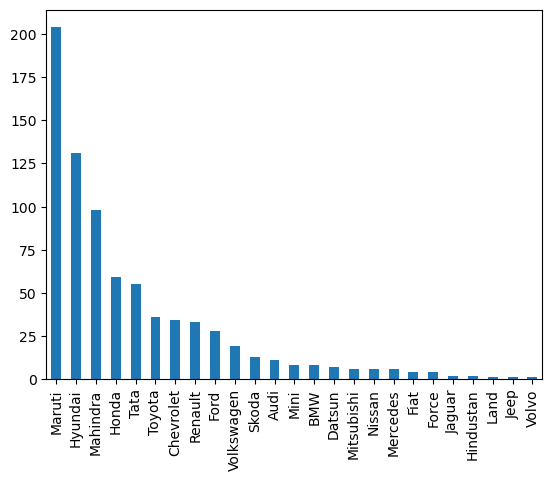

In [46]:
car['company'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Price', ylabel='Count'>

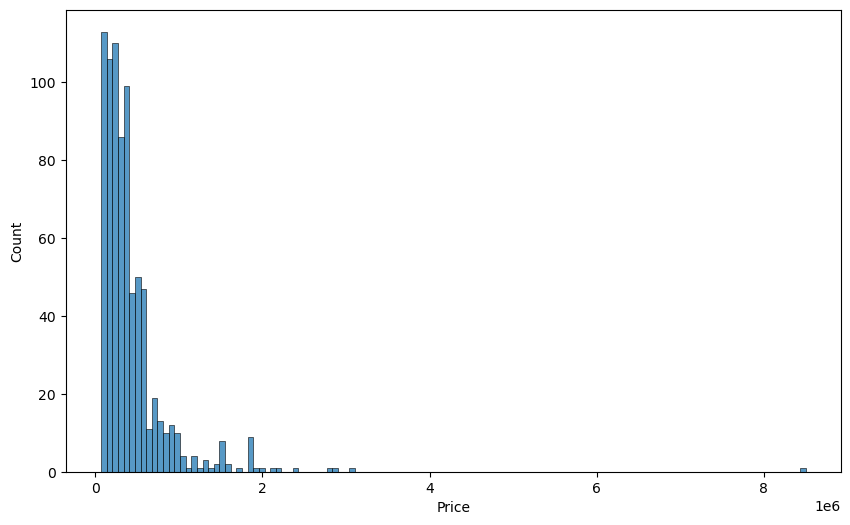

In [47]:
plt.figure(figsize=(10,6))
sns.histplot(car['Price'])

<AxesSubplot:ylabel='fuel_type'>

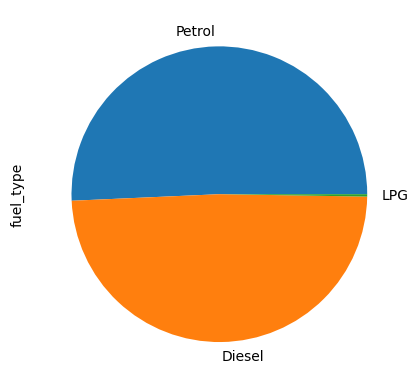

In [48]:
car['fuel_type'].value_counts().plot(kind='pie')

<AxesSubplot:>

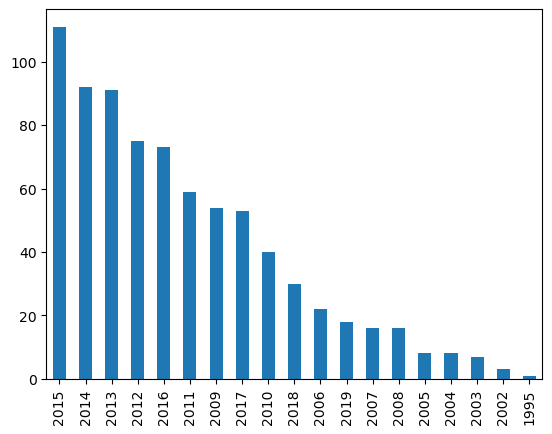

In [49]:
car['year'].value_counts().plot(kind='bar')

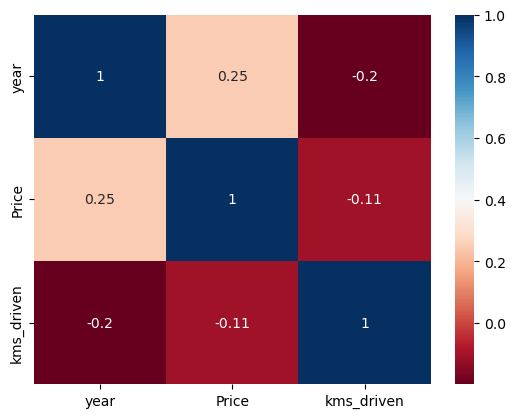

In [50]:
sns.heatmap(car.corr(), annot = True, cmap='RdBu')
plt.show()

# Model Building

In [51]:
# Creating dummies for categorical values
car_dup.drop(labels='name', axis=1, inplace = True)

car_dup.drop(labels='company', axis=1, inplace = True)

car_dup.drop(labels='fuel_type', axis=1, inplace = True)

In [52]:
X=car.drop(columns='Price') #Independent Feature
y=car['Price']  #target variable

X1=car_dup.drop(columns='Price') #Independent Feature
y1=car_dup['Price']  #target variable

In [53]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [54]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 777, dtype: int32

# TRAIN - TEST SPLIT

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.2)

In [510]:
X_train

,name,company,year,kms_driven,fuel_type
202,Mahindra Quanto C8,Mahindra,2013,20000,Diesel
544,Chevrolet Enjoy,Chevrolet,2014,30201,Diesel
710,Maruti Suzuki Omni,Maruti,2013,25000,Petrol
303,Honda Mobilio,Honda,2014,44000,Petrol
497,Maruti Suzuki Eeco,Maruti,2015,39000,Petrol
...,...,...,...,...,...
396,Hyundai Grand i10,Hyundai,2016,59910,Diesel
728,Tata Indica V2,Tata,2012,64000,Diesel
476,Maruti Suzuki Wagon,Maruti,2014,18500,Petrol
702,Hyundai Santro Xing,Hyundai,2007,47000,Petrol


In [511]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error  #to measure regression problems(r2_score)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import metrics

# ONE HOT ENCODING

In [512]:
ohe= OneHotEncoder() # transforms this categorical feature into multiple binary (0 or 1) features
ohe.fit(X[['name','company','year','kms_driven','fuel_type']]) #fitted one hot encoder, change xtrain nd xtest

OneHotEncoder()

In [513]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [514]:
column_trans= make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','year','kms_driven','fuel_type']),remainder='passthrough')
#column transformer will put onehotencoder on column specified there('name','company','fuel_type')
#unwanted columns passes through

# KNN MODEL

In [515]:
# Create and train the KNN model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)  # Adjust 'n_neighbors' as needed
pipe1=make_pipeline(column_trans,knn) 

In [516]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
        90000,  90001,  95000,  95500,  97000,  97200,  99000, 100000,
       100200, 100800, 102563, 103553, 104000, 111111, 116000, 117000,
       120000, 129000, 130000, 131000, 132000, 133000, 140000, 146000,
       147000, 150000, 160000, 166000, 170000, 175400, 175430, 195000,
       200000, 400000]),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                         

In [517]:
y_pred1=pipe1.predict(X_test)

In [518]:
y_pred1

array([ 199000. ,  235599.6,  296000. ,  440999.4,  467200. ,  292799.4,
        213999.8,  487000. ,  306999.8,  631999.6,  398600. ,  337999.8,
       1891111. ,  247900. ,  464899.8,  312000. ,  349899.8,  279400. ,
        243000. ,  356000. ,  248000. ,  186700. ,  640000. ,  550999.4,
        298799.2,  721000. ,  322999.6,  360800. ,  297000. ,  131200. ,
        373999.8,  458783.4,  409999.8,  886000. ,  196999.8,  439700. ,
        360999.8,  445000. ,  113000. ,  381999.6,  382799.8,  852800. ,
        413000. ,  275000. ,  500000. ,  179000. ,  185800. ,  206700. ,
        339999.4,  279600. ,  163000. ,  253199.6,  241600. ,  235000. ,
        179000. ,  288199.4,  412899.8,  333799.6,  155600. ,  267799.8,
        475200. ,  619999.8,  188999.8,  343999.6,  279400. ,  200000. ,
        506999.6,  176000. ,  257844.2,  346000. ,  542999.6,  343499.8,
        186899.6,  570999.4,  284000. ,  344999.8,  163000. ,  442000. ,
        465799.4,  433999.4,  327000. ,  248000. , 

In [519]:
r2_score(y_test,y_pred1) 

0.4951758575422158

In [520]:
mean_squared_error(y_test, y_pred1)

75714652714.62874

In [521]:
scores1=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    knn = KNeighborsRegressor(n_neighbors=5)
    pipe1=make_pipeline(column_trans,knn)
    pipe1.fit(X_train,y_train)
    y_pred1=pipe1.predict(X_test)
    print(r2_score(y_test,y_pred1),i)
    scores1.append(r2_score(y_test,y_pred1))

0.38715714613625996 0
0.4123883911007017 1
0.31051757251273615 2
0.09581258080643662 3
0.7369064392039217 4
0.11655999140219542 5
0.4348925498965306 6
0.11394034453397683 7
0.19402243480222647 8
0.6859415489076954 9
0.2060612016143445 10
0.28500362749863284 11
0.29172785090295283 12
0.48581011866901436 13
0.5875448184407952 14
0.2647539546143788 15
0.13347245007532327 16
0.5030374013418754 17
0.4467971993409482 18
0.11477757138629863 19
0.2622366236514998 20
0.5896527441690294 21
0.22905115071279347 22
0.1999389980411047 23
0.37383965439145594 24
0.37755780027704877 25
0.2986947912498821 26
0.4515076907195854 27
0.14835375145423146 28
0.18218660241581852 29
0.4338629332381948 30
0.23341599082000308 31
0.5641709636264862 32
-0.04703521385984244 33
0.3409442857788424 34
0.2695551490808037 35
-0.18240177554153014 36
0.2644504319731328 37
0.5737991229287812 38
0.1769194193086845 39
0.11637519810897279 40
0.5108334954474537 41
0.5709499307620178 42
0.1333322494217255 43
0.46241443145455063 

In [522]:
np.argmax(scores1)

739

In [523]:
scores1[np.argmax(scores1)]

0.7721401125841878

In [524]:
pipe1.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,300,'Petrol']], columns=['name','company','year','kms_driven','fuel_type']))

array([340000.])

### if some categories on xtest which are not on xtrain , this will show error...

### we passed all categories to onehotencoder so that it could know about all categories

# LINEAR REGRESSION MODEL

In [525]:
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr) 
#sent linear regression nd column transformer in pipeline
#the input data given->column_trans(one hot encoder->columns transformed)->transformed nd prev columns given to lr 

In [526]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
        90000,  90001,  95000,  95500,  97000,  97200,  99000, 100000,
       100200, 100800, 102563, 103553, 104000, 111111, 116000, 117000,
       120000, 129000, 130000, 131000, 132000, 133000, 140000, 146000,
       147000, 150000, 160000, 166000, 170000, 175400, 175430, 195000,
       200000, 400000]),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                         

### No onehotencoder on xtrain columns but can send xtrain nd ytrain directly here
### Pipeline will apply columntrans(tranformation)->linear regression
### One end of pipeline(raw data)-> predictions(other end)
### After training we dump this pipe nd will directly use it on website
### Pipeline has everything (column transformer nd linear regression)
### On website dont hv to do encoding transforming nd prediction(applying to Models)..

In [527]:
y_pred=pipe.predict(X_test)

In [528]:
y_pred

array([ 346118.46523535,  319261.89778646,  632173.0744583 ,
        652491.12376147,  462439.93264167,  472665.08029024,
        332809.73749661,  386974.79972349,  281342.57370232,
        443264.74305415,  480695.69334939,  350050.14289278,
        478164.90393733,  416727.14131136,   88830.63870943,
        206920.51963911, 1131913.02716637,   -8079.73720672,
        679070.61848064,  347175.35022621,   40179.45898888,
        276657.17976616, -184909.50823544,  279662.33020474,
       1245947.9457389 ,  388675.12547371,  194666.71702803,
       1461560.25866295,  120986.4367332 ,  416072.84778355,
        451665.0177032 ,  421609.13389382,  191548.0756575 ,
        493799.65047178,  368758.51259041,  107282.94341041,
        579999.44826511,  100262.84594205,  354674.40145558,
        396206.76217416,  320861.24104885,  421407.68280371,
         68910.28040958,  830001.62216988,  320001.35361882,
        396206.76217416,  546536.89362062,  263619.18254318,
        322696.71294582,

In [529]:
r2_score(y_test,y_pred)  

0.7097036062841329

In [530]:
mean_squared_error(y_test, y_pred)

57532526668.68382

In [531]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    print(r2_score(y_test,y_pred),i)
    scores.append(r2_score(y_test,y_pred))

0.7286551160804668 0
-2.407154666860968 1
0.5261308815126202 2
-1.304615815551394 3
-2.8687487152439126 4
0.15036358077300338 5
0.7225584696729728 6
-1.358148094404255 7
-1.6122131717630896 8
-2.598440552831779 9
0.2466751139895157 10
-2.434043789282541 11
-2.9970787710590363 12
0.6791827194332736 13
-4.065871969226957 14
-2.3460589067415984 15
0.12051317270608342 16
-1.445172168629664 17
-1.9622761313369348 18
0.09802118934064341 19
0.650357936049091 20
-2.2408897400798633 21
0.6485595629466394 22
0.6173652118190538 23
0.53728806095071 24
-2.341121458691182 25
0.5982651415016693 26
0.8192986716586204 27
0.17060834045288187 28
0.20205371571424868 29
0.7400369753050063 30
0.6061282198968674 31
-2.156484267274922 32
-1.8827644550554874 33
0.6733957826814467 34
0.5672013368532649 35
-6.597233811981485 36
-2.1731379177283086 37
0.6890006206372962 38
0.23083122303666648 39
0.19228661212903275 40
0.640940689980288 41
0.6548071217340212 42
0.17747698529143352 43
-2.6603810297072434 44
0.20719

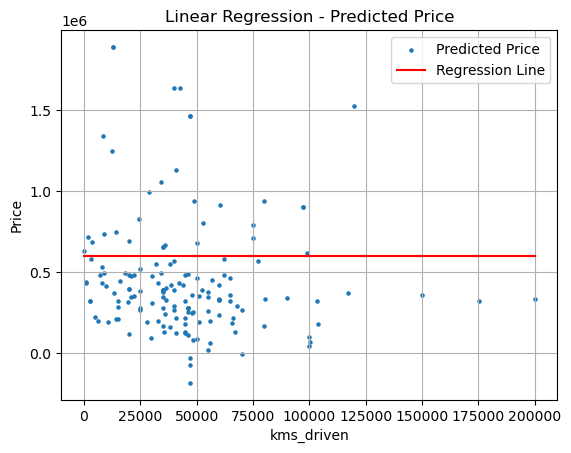

In [532]:
import matplotlib.pyplot as plt

feature_to_plot = 'kms_driven'
X_train_plot = X_train[feature_to_plot]
X_test_plot = X_test[feature_to_plot]

#plt.scatter(X_train_plot, y_train, s=5, label='Training')
plt.scatter(X_test_plot, y_pred, s=5, label='Predicted Price')

m = pipe.steps[-1][1].coef_[0]  # Access slope coefficient from last step (linear regression)
b = pipe.steps[-1][1].intercept_  # Access intercept coefficient
y_pred_line = m * X_test_plot + b
plt.plot(X_test_plot, y_pred_line, color='red', label='Regression Line')

plt.xlabel(feature_to_plot)
plt.ylabel('Price')
plt.title('Linear Regression - Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

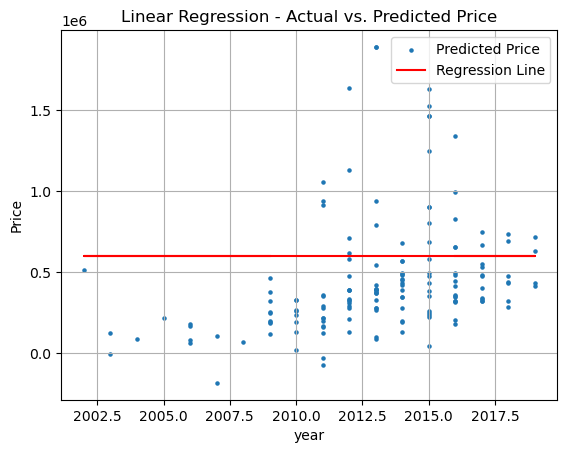

In [533]:
import matplotlib.pyplot as plt

feature_to_plot = 'year'
X_train_plot = X_train[feature_to_plot]
X_test_plot = X_test[feature_to_plot]

#plt.scatter(X_train_plot, y_train, s=5, label='Training')
plt.scatter(X_test_plot, y_pred, s=5, label='Predicted Price')

m = pipe.steps[-1][1].coef_[0]  # Access slope coefficient from last step (linear regression)
b = pipe.steps[-1][1].intercept_  # Access intercept coefficient
y_pred_line = m * X_test_plot + b
plt.plot(X_test_plot, y_pred_line, color='red', label='Regression Line')

plt.xlabel(feature_to_plot)
plt.ylabel('Price')
plt.title('Linear Regression - Actual vs. Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

In [534]:
np.argmax(scores)

754

In [535]:
scores[np.argmax(scores)]

0.8730792349337412

In [536]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8730792349337412

# DECISION TREE CLASSIFIER

In [57]:
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor(random_state=1)
dt.fit(X_train1, y_train1)
predicted_prices = dt.predict(X_test1)
predicted_prices=pd.DataFrame(predicted_prices)

In [60]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(predicted_prices, y_test1)
print('mean absolute error: ',mae)
print('mean price in df:', car['Price'].mean(), '\nmae/mean, %:',100*mae/car['Price'].mean())

mean absolute error:  262781.1824786325
mean price in df: 429750.42342342343 
mae/mean, %: 61.14739349999897


In [61]:
predicted_prices

,0
0,224500.0
1,95000.0
2,150000.0
3,1000000.0
4,110000.0
...,...
151,200000.0
152,200000.0
153,395000.0
154,95000.0


# ARTIFICIAL NEURAL NETWORK

In [537]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [538]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) # O/P

model.compile(optimizer='rmsprop', loss='mse')

In [539]:
import tensorflow as tf

X_train1 = tf.convert_to_tensor(X_train1, dtype=tf.float32)
y_train1 = tf.convert_to_tensor(y_train1, dtype=tf.float32)
X_test1 = tf.convert_to_tensor(X_test1, dtype=tf.float32)
y_test1 = tf.convert_to_tensor(y_test1, dtype=tf.float32)
model.fit(X_train1, y_train1, epochs=10, validation_data=(X_test1,y_test1))

Epoch 1/10
20/20 [==============================] - 1s 8ms/step - loss: 342292299776.0000 - val_loss: 716009766912.0000
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 337912594432.0000 - val_loss: 711473102848.0000
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 334214856704.0000 - val_loss: 707494477824.0000
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 331010703360.0000 - val_loss: 703615336448.0000
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 327724269568.0000 - val_loss: 699583758336.0000
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 323873964032.0000 - val_loss: 694577463296.0000
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 319562678272.0000 - val_loss: 689104879616.0000
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 314691747840.0000 - val_loss: 682927783936.0000
Epoch 9/10
20/20 [======================

In [540]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                90        
                                                                 
 dense_16 (Dense)            (None, 10)                310       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 411 (1.61 KB)
Trainable params: 411 (1.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [541]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

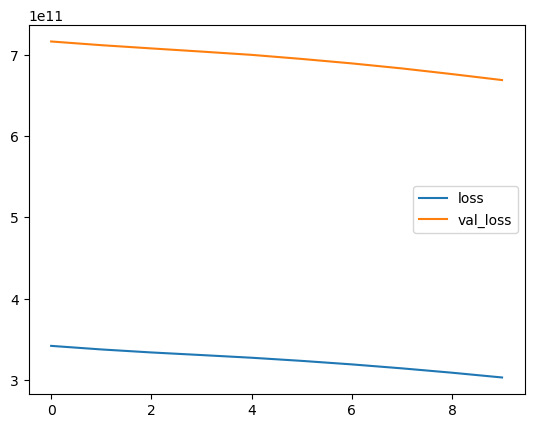

In [542]:
loss_df.plot()

In [543]:
model.evaluate(X_test1, y_test1)

5/5 [==============================] - 0s 2ms/step - loss: 668625731584.0000


668625731584.0

In [544]:
train_pred = model.predict(X_train1)
# print(pred_train)

20/20 [==============================] - 0s 1ms/step


In [545]:
test_pred = model.predict(X_test1)

5/5 [==============================] - 0s 2ms/step


In [546]:
r2_train = r2_score(y_train1, train_pred)
print("R Squared value of train dataL: ",r2_train)

R Squared value of train dataL:  -0.8802075795210831


In [547]:
r2_test = r2_score(y_test1, test_pred)
print("R Squared value of test data:", r2_test)

R Squared value of test data: -0.31277754471079877


In [548]:
diff_r2_scores = r2_train - r2_test

In [549]:
print("Difference between two scores: ", diff_r2_scores.round(2))

Difference between two scores:  -0.57


In [550]:
#above the pipeline is ready so now will drop it off

In [551]:
import pickle

In [552]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [553]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,300,'Petrol']], columns=['name','company','year','kms_driven','fuel_type']))

array([630154.09798024])

In [554]:
car.info

<bound method DataFrame.info of                        name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
2         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
4                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
812          Tata Indica V2      Tata  2009  110000       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
814            Tata Zest XM      Tata  2018  260000       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[777 rows x 6 columns]>

In [555]:
car['name']

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
2           Hyundai Grand i10
3      Ford EcoSport Titanium
4                   Ford Figo
                ...          
811        Maruti Suzuki Ritz
812            Tata Indica V2
813      Toyota Corolla Altis
814              Tata Zest XM
815        Mahindra Quanto C8
Name: name, Length: 777, dtype: object